In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
from __future__ import division  #needed for eval to divide fractions to float instead of integer default of Python v<3
from utils_read_parsing import *

%matplotlib inline
plt.style.use = 'default'
plt.rcParams['figure.figsize'] = (8, 6)
pd.options.display.max_columns = 999

### Import data files

In [52]:
posts = pd.read_csv('post_survey_results.txt', sep='\t')
posts.replace('Absorbance','L',inplace=True)
posts.replace('Capacitance','C',inplace=True)
filenameL_ans = 'postSurvey_L_answerKey.csv'
filenameC_ans = 'postSurvey_C_answerKey.csv'
dfL_ans_raw = pd.read_csv(filenameL_ans, delimiter='\t', encoding='utf-16')
dfC_ans_raw = pd.read_csv(filenameC_ans, delimiter='\t', encoding='utf-16')

In [53]:
posts

,Unnamed: 0,age,debug1,debug2,english.0-writing,english.1-reading,[gender] To which gender do you most identify? [Gender non conforming/non-binary],[gender] To which gender do you most identify? [Man],[gender] To which gender do you most identify? [Prefer not to answer],gender-Woman,original id,major,open1,open2,perceivedvalue.0-boring,perceivedvalue.1-productive,perceivedvalue.2-useless,perceivedvalue.3-engaging,pocc.0-learning the basic concepts,pocc.1-testing my ideas and theories,pocc.2-answering given questions,pocc.3-memorizing key information,pocc.4-exploring the topic,qual2,qual3,qual4,qual5,qual5reasoning,qual6,qual6reasoning,quant.0,quant.0.1,quant.1,quant.1.1,quant.2,quant.2.1,quant.3,quant.3.1,strategies.0-setup my first experiment right away,strategies.10-try to identify mathematical relationships,strategies.11-try to apply my prior knowledge of physics,strategies.12-predict the result of a test before trying something out,strategies.13-decide what to investigate based on previous results,strategies.14-identify what I haven't investigated yet,strategies.1-spend time designing a set of experiments I want to conduct,strategies.2-make a plan,strategies.3-explore the different components of the PhET interface,strategies.4-identify important variables,strategies.5-look for weird outcomes I did not expect,strategies.6-look for general patterns and then dive into detailed experimentation,strategies.7-check if the relationships I found hold under different conditions,strategies.8-think about why I get the results I get,strategies.9-summarize my findings as I go,strategies_att.0-try to get the right answer,strategies_att.1-improve my scientific reasoning skill,strategies_att.2-try to learn more about the topic,strategies_att.3-finish as quickly as possible,strategies_att.4-come up with my own questions to investigate,taskinterpretation.0-investigate the basic mechanics of the topic at hand,taskinterpretation.1-design my own experiments that can help me understand the topic at hand,taskinterpretation.2-memorize information about the topic at hand,taskinterpretation.3-complete a certain number of questions,taskinterpretation.4-develop scientific reasoning skills,[year] What year are you in? [1st year undergraduate],[year] What year are you in? [2nd year undergraduate],[year] What year are you in? [3rd year undergraduate],[year] What year are you in? [4th year undergraduate],sim,sim_index,qual1,sid
0,2,18-19,"Based on virtual lab results, the charge vs. p...",The negative should not be there because it on...,Fluent,Fluent,NaN,NaN,NaN,1.0,77047160,*Non science or applied science major,I conducted 4 different experiments where I va...,Graphs helped visualize the patterns. Next tim...,Somewhat,Mostly,Not at all,Mostly,Often,Almost always,Almost always,Often,Often,higher voltage battery (https://survey.ubc.ca/...,(https://survey.ubc.ca/media/assets/user/2316...,smaller separation (https://survey.ubc.ca/medi...,(https://survey.ubc.ca/media/assets/user/2316...,The magnitude of the voltage is increasing in ...,two large plates perfectly aligned (https://su...,The plates need to be aligned perfectly in ord...,NaN,0.5,NaN,0.25,NaN,2,NaN,08-Jan,Mostly,Definitely,Somewhat,Mostly,Mostly,Mostly,Mostly,Somewhat,Mostly,Somewhat,Definitely,Mostly,Definitely,Definitely,Definitely,Definitely,Mostly,Somewhat,Somewhat,Mostly,Mostly,Mostly,Somewhat,Mostly,Mostly,1.0,NaN,NaN,NaN,C,2,larger plates (https://survey.ubc.ca/media/ass...,77047160
1,3,20-22,"k1, k2, and k3 are unnecessary. There should b...","s^2 should be s, as Q is inversely proportiona...",Average,Fluent,NaN,1.0,NaN,NaN,90447168,*Undeclared,I tried to explore more different combinations...,I believe I managed to find all the possible o...,Not at all,Mostly,Not at all,Mostly,Almost always,Often,Almost always,Almost always,Often,higher voltage battery (https://survey.ubc.ca/...,(https://survey.ubc.ca/media/assets/user/2316...,smaller separation (https://survey.ubc.ca/medi...,(https://su

In [35]:
### Filter out only post-assessment data and rename columns

def filter_df( df, pattern, new_headers ):
    headers = list(df)
    filtered_headers = [header for header in headers if re.search(pattern, header)]
    df2 = df.loc[:, filtered_headers]  
    newcolnames = {header : new_header for (header, new_header) in zip(filtered_headers, new_headers)}
    df2.rename(columns=newcolnames, inplace=True)
    return df2

#pick out only column that match student ID, qual or quant questions
other_pattern = '\[id\]'
qual_pattern = '\[qual[0-9]\]'
quant_pattern = '\[quant\.[0-9]'  #specify number in regex only needed in case we only want certain specific Qs
pattern = other_pattern + '|' + qual_pattern + '|' + quant_pattern

#pick out new names for the columns that will be picked from above patterns
other_colnames = ['id']
qual_colnames = ['qual1','qual2','qual3','qual4','qual5','qual6']
quant_colnames = ['quant1','quant2','quant3','quant4']
colnames = other_colnames + qual_colnames + quant_colnames

# #filter and rename capacitor dataframe
# dfC_LC = filter_df( dfC_LC_raw, pattern, colnames )
# dfC_LC.loc[:,'condition'] = pd.Series('LC', index=dfC_LC.index) #add column for condition i.e. if C was first or last
# dfC_CL = filter_df( dfC_CL_raw, pattern, colnames )
# dfC_CL.loc[:,'condition'] = pd.Series('CL', index=dfC_CL.index)
# dfC = pd.concat([dfC_LC, dfC_CL], ignore_index=True)
# # dfC=dfC.set_index('id')  #this is for setting ID as row index
# # dfC.index.name = None
# print dfC.shape

# #filter and rename light absorbance dataframe
# dfL_LC = filter_df( dfL_LC_raw, pattern, colnames )
# dfL_LC.loc[:,'condition'] = pd.Series('LC', index=dfL_LC.index) #add column for condition i.e. if L was first or last
# dfL_CL = filter_df( dfL_CL_raw, pattern, colnames )
# dfL_CL.loc[:,'condition'] = pd.Series('CL', index=dfL_CL.index)
# dfL = pd.concat([dfL_LC, dfL_CL], ignore_index=True)
# # dfL=dfL.set_index('id')  #this is for setting ID as row index
# # dfL.index.name = None
# print dfL.shape

#filter and rename answer key dataframes
dfC_quant_ans = filter_df( dfC_ans_raw, quant_pattern, quant_colnames )
dfC_qual_ans = filter_df( dfC_ans_raw, qual_pattern, qual_colnames )
dfC_ans = pd.concat([dfC_qual_ans, dfC_quant_ans], axis=1)
print dfC_ans.shape

dfL_quant_ans = filter_df( dfL_ans_raw, quant_pattern, quant_colnames )
dfL_qual_ans = filter_df( dfL_ans_raw, qual_pattern, qual_colnames )
dfL_ans = pd.concat([dfL_qual_ans, dfL_quant_ans], axis=1)
print dfL_ans.shape


# # df.dtypes  #find what type is each column
# # # find bad student IDs to fix  
# # # need to check validity of ID --> needs to start with one, or too few characters needs to be checked.
# # print set(dfC['id'])-set(dfL['id']) 
# # print set(dfL['id'])-set(dfC['id'])
# # # this finds duplicate entries
# IDcounts = Counter(list(dfL['id']))
# duplicates=[ID for ID in IDcounts if IDcounts[ID]>1]
# # dfL[ dfL['id'] == duplicates ]  #examine duplicates
# # dfL.set_value(73, 'id', 23784336) #change ID for one of the duplicates assuming different dates.
# dfL = dfL[ dfL['id'] != duplicates ] #remove duplicates
# # dfL.reset_index(level=0, drop=True)
# dfC = dfC[ dfC['id'] != duplicates ] #remove duplicates
# # dfC.reset_index(level=0, drop=True) #reset index after dropping duplicates
# #dfL.drop_duplicates(...)  could also use this method

# # # merge C and L results in one dataframe
# # df = pd.merge(dfC, dfL, on=['id','condition'], how='outer', suffixes=('_C', '_L'))
# # # move condition column before data results
# # cols = list(df)
# # cols.remove('condition')
# # cols.insert(1, 'condition')
# # df = df[cols]
# # df['id'] = df['id'].astype(int) # <-- this shouldn't be needed but check!
# # # create new column for bad IDs that were fixed so that we can track with sim + handouts
# # # df.loc[:,'id_flag'] = pd.Series(0, index=df.index)
# # # for student in flag_student_IDs:
# # #     df[df['id']==student]['id_flag']=1 



(1, 10)
(1, 10)


In [36]:
# def create_year_column( df, years ):
#     headers = list(df)
#     for year in years:  #this is ugly/slow must be a better way 
#         for header in headers:
#             if re.search('\[year\].*' + year, header):
#                 idx = df[ df[header] == 1 ].index.tolist()
#                 df.set_value(idx, 'year', year)
        
# years = ['1','2','3','4','5','6','Mast','Doct']

# #pick out only column that match student ID, qual or quant questions
# some_pattern = '\[major\]|\[year\]'

# #pick out new names for the columns that will be picked from above patterns
# year_colnames = ['[year] ' + year for year in years]
# some_colnames = ['major'] + year_colnames
# df_demo = filter_df( dfL_CL_raw, some_pattern, some_colnames )
# create_year_column( df_demo, years )
# df_demo

In [37]:
# def what_is_year ( row, *years ):
#     cols = row.index
#     for year, col in zip(years, cols):
#         if row[col]==1:
#             return year

# df_demo2 = filter_df( dfL_CL_raw, some_pattern, some_colnames )
# df_demo2.loc[:,'year'] = df_demo2[ year_colnames ].apply(what_is_year, axis=1, args=years)
# df_demo2

### Grade qual questions

In [60]:
#create grading function for qualitative Qs
def grade_qual_questions( df, df_ans, sim, questions, id_col, ReportWrong = False ):
    students = df[id_col]
    print questions
    for student in students:
        for question in questions:
            idx = df[(df[id_col]==student)&(df['sim']==sim)].index.tolist()[0]
            if df.loc[idx][question] == df_ans.loc[0][question]:
                df.set_value(idx, question + '_' + sim + '_score', 1)
            else:
                df.set_value(idx, question + '_' + sim + '_score', 0)
                if ReportWrong:
                    print question, student
                    print df[df['id']==student][question].values
                    print df_ans[question].values, '\n'

grade_qual_questions(posts, dfL_ans, 'L', qual_colnames, 'sid' )
grade_qual_questions(posts, dfC_ans, 'C', qual_colnames, 'sid' )

['qual1', 'qual2', 'qual3', 'qual4', 'qual5', 'qual6']
['qual1', 'qual2', 'qual3', 'qual4', 'qual5', 'qual6']


In [68]:
posts[['qual1_L_score','qual2_L_score','qual3_L_score','qual4_L_score','qual5_L_score','qual6_L_score','qual1_C_score','qual2_C_score','qual3_C_score','qual4_C_score','qual5_C_score','qual6_C_score']].describe()

,qual1_L_score,qual2_L_score,qual3_L_score,qual4_L_score,qual5_L_score,qual6_L_score,qual1_C_score,qual2_C_score,qual3_C_score,qual4_C_score,qual5_C_score,qual6_C_score
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.959459,0.770270,0.898649,0.750000,0.554054,0.675676,0.966216,0.993243,0.716216,0.972973,0.932432,0.858108
std,0.197893,0.422087,0.302818,0.434483,0.498757,0.469711,0.181286,0.082199,0.452364,0.162713,0.251855,0.350124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Grade quant questions

In [20]:
#create grading function for quant Qs
def is_number( string ):
    try:
        float( eval( re.sub('[pPcC]', '', string) )) #this evaluates fractions and strips units
        return True
    except:
        return False

def make_number( string ):
    return float( eval( re.sub('[pPcC]', '', string) ))

def grade_quant_questions( df, df_ans, questions, id_header, ReportWrong = False, ManualGrade = False ):
    students = df[id_header]
    for question in questions:
        for student in students:
            idx = df[df['id']==student].index.tolist()[0]
            student_ans = df.loc[idx][question]
            correct_ans = df_ans.loc[0][question]
            if is_number( student_ans ):
                if make_number( student_ans ) == correct_ans:
                    df.set_value(idx, question + '_score', 2)
                else:
                    df.set_value(idx, question + '_score', 0)
                    if ReportWrong:
                        print question, student
                        print student_ans, correct_ans, '\n',
            else:
                # if ManualGrade == False then no value is set and score is NaN
                if ManualGrade:
                    print question, student, '->', student_ans, '| ans =', correct_ans, '| manual score = ',
                    manual_score = input()
                    df.set_value(idx, question + '_score', manual_score)

grade_quant_questions( dfL, dfL_ans, quant_colnames, 'id', ManualGrade = True )


 quant1 64006159 -> highrer than 0.2 | ans = 0.1 | manual score = 0
 quant1 59043165 -> decrease | ans = 0.1 | manual score = 1
 quant1 89047164 -> same | ans = 0.1 | manual score = 0
 quant1 55825144 -> lower | ans = 0.1 | manual score = 1
 quant1 15072160 -> absorbance would decrease | ans = 0.1 | manual score = 1
 quant1 19562150 -> smaller | ans = 0.1 | manual score = 1
 quant1 13654167 -> double maybe | ans = 0.1 | manual score = 0
 quant1 17595160 -> less than 0.2 | ans = 0.1 | manual score = 1
 quant1 11892169 -> lower | ans = 0.1 | manual score = 1
 quant1 15444164 -> increase | ans = 0.1 | manual score = 0
 quant1 17007153 -> lower ( around 0.1) | ans = 0.1 | manual score = 1
 quant1 15188167 -> less than 0.2 | ans = 0.1 | manual score = 1
 quant1 13122150 -> 0.1?? I am not sure because I didn't finish the experiment but definately smaller than 0.2 | ans = 0.1 | manual score = 1
 quant1 26984162 -> Half the absorbance | ans = 0.1 | manual score = 2
 quant2 64006159 -> lower th

In [ ]:
dfL.head()

condition
CL    Axes(0.125,0.125;0.775x0.775)
LC    Axes(0.125,0.125;0.775x0.775)
Name: quant1_score, dtype: object

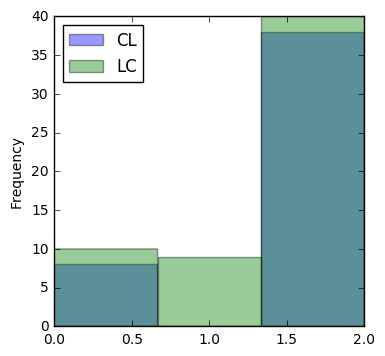

In [93]:
# print(dfL.describe())  #basic descriptive stats for each column
# dfL.hist(bins=3)  #plots set of histograms for all columns
# dfL.groupby('condition').hist(bins=3)  #plots 2 sets of histograms of each column, one set for each condition
# histogram of one column grouped by condition and overlayed
dfL.groupby('condition').quant1_score.plot.hist(bins=3,alpha=0.4,legend=True)  
# dfL.groupby('condition').count()
# dfL.groupby('condition').transform(lambda x: x / x.count())  #useful snippet to manipulate column data per condition

# making histograms directly using numpy/matplotlib for full control, e.g. normalizing frequency so to sum=1
# x1 = dfL[dfL['condition']=='CL']['quant1_score']
# x2 = dfL[dfL['condition']=='LC']['quant1_score']
# hist1, bins1 = np.histogram(x1, bins=3)
# hist2, bins2 = np.histogram(x2, bins=3)
# plt.bar(bins1[:-1], hist1 / hist1.sum(), width=(bins1[1]-bins1[0]), color='red',alpha=0.5, label='CL')
# plt.bar(bins2[:-1], hist2 / hist2.sum(), width=(bins2[1]-bins2[0]), color='blue',alpha=0.5, label='LC')
# plt.legend(loc='upper left')